In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [55]:
df_female_act = pd.read_csv('data/mouse_fem_act.csv')
df_male_act = pd.read_csv('data/mouse_male_act.csv')
df_female_temp = pd.read_csv('data/mouse_fem_temp.csv')
df_male_temp = pd.read_csv('data/mouse_male_temp.csv')

In [56]:
df_female = df_female_act.merge(df_female_temp, left_index=True, right_index=True, suffixes=('_act','_temp'))
df_male = df_male_act.merge(df_male_temp, left_index=True, right_index=True, suffixes=('_act','_temp'))

In [57]:
df_female.duplicated().sum(),df_male.duplicated().sum()

(np.int64(0), np.int64(0))

In [58]:
df_female.isnull().sum().sum(),df_male.isnull().sum().sum()

(np.int64(0), np.int64(0))

In [59]:
df_female = df_female.set_index('time')
df_male = df_male.set_index('time')
df_female.index = df_female.index / 60
df_male.index = df_male.index / 60

df_female = df_female.groupby(df_female.index.astype(int)).mean().reset_index()
df_male = df_male.groupby(df_male.index.astype(int)).mean().reset_index()

In [60]:
# create date and hour column
df_female['day'] = df_female['time'] // 24 + 1
df_female['hour'] = df_female['time'] % 24
df_male['day'] = df_male['time'] // 24 + 1
df_male['hour'] = df_male['time'] % 24

# check if it's night
df_female['is_night'] = (df_female['hour'] // 12).astype(bool)
df_male['is_night'] = (df_male['hour'] // 12).astype(bool)

# check the estrus of female
df_female['is_estrus'] = ~((df_female['day'] - 2) % 4).astype(bool)

# while male don't have estrus, display it for male as well
df_male['is_estrus'] = ~((df_male['day'] - 2) % 4).astype(bool)


In [61]:
df_male

,time,m1_act,m2_act,m3_act,m4_act,m5_act,m6_act,m7_act,m8_act,m9_act,...,m8_temp,m9_temp,m10_temp,m11_temp,m12_temp,m13_temp,day,hour,is_night,is_estrus
0,0,22.474576,17.016949,15.338983,30.542373,59.322034,32.576271,30.830508,35.389831,22.949153,...,37.508644,36.782373,36.799831,36.867000,36.918305,37.393220,1,0,False,False
1,1,43.216667,65.666667,49.183333,76.066667,48.366667,59.500000,65.616667,41.316667,41.683333,...,38.080333,37.105333,38.048667,37.740667,37.745333,37.991000,1,1,False,False
2,2,50.083333,58.183333,36.483333,75.966667,52.250000,61.584306,54.483333,43.400000,39.300000,...,38.051500,37.627333,38.049667,37.412833,37.625167,37.841333,1,2,False,False
3,3,47.916667,57.100000,37.483333,80.750000,69.866667,69.750000,76.533333,45.216667,37.500000,...,37.553333,37.179833,37.506333,37.204716,37.552333,37.898667,1,3,False,False
4,4,41.733333,49.550000,20.900000,83.950000,60.716667,20.016667,69.133333,41.116667,44.550000,...,37.524833,37.175667,37.560500,37.675433,37.360000,37.317667,1,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,7.116667,0.000000,17.066667,0.000000,7.916667,0.000000,22.916667,0.000000,2.600000,...,37.000000,35.550833,35.637167,36.193333,35.537500,37.000000,14,20,True,True
333,333,13.950000,0.000000,7.433333,0.000000,46.993590,0.000000,0.800000,0.000000,7.283333,...,37.000000,35.602000,35.740167,35.813000,35.635333,37.000000,14,21,True,True
334,334,15.750000,0.000000,23.883333,0.000000,5.616667,0.000000,2.633333,0.000000,6.900000,...,37.000000,35.552167,36.257667,35.656333,36.008333,37.000000,14,22,True,True
335,335,9.333333,0.000000,4.666667,0.000000,54.610257,0.000000,25.383333,0.000000,11.700000,...,37.000000,35.654500,35.972833,36.160333,35.676667,37.000000,14,23,True,True


In [62]:
mouse_act_df = df_male.merge(df_female)
mouse_act_df.to_csv('mouse.csv', index=False)

In [63]:
mouse_act_df.columns

Index(['time', 'm1_act', 'm2_act', 'm3_act', 'm4_act', 'm5_act', 'm6_act',
       'm7_act', 'm8_act', 'm9_act', 'm10_act', 'm11_act', 'm12_act',
       'm13_act', 'm1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'm5_temp',
       'm6_temp', 'm7_temp', 'm8_temp', 'm9_temp', 'm10_temp', 'm11_temp',
       'm12_temp', 'm13_temp', 'day', 'hour', 'is_night', 'is_estrus',
       'f1_act', 'f2_act', 'f3_act', 'f4_act', 'f5_act', 'f6_act', 'f7_act',
       'f8_act', 'f9_act', 'f10_act', 'f11_act', 'f12_act', 'f13_act',
       'f1_temp', 'f2_temp', 'f3_temp', 'f4_temp', 'f5_temp', 'f6_temp',
       'f7_temp', 'f8_temp', 'f9_temp', 'f10_temp', 'f11_temp', 'f12_temp',
       'f13_temp'],
      dtype='object')

- time: Minute-level timestamp, sequentially ordered from the start of the experiment.
- day: Experimental day (1–14), representing the full duration of the study.
- hour: Hour of the day (0–23), indicating the time within a 24-hour cycle.
- is_night: Boolean indicator (1 = night, 0 = day), denoting whether the light cycle is in the dark phase (mice are nocturnal and more active during this period).
- is_estrus: Boolean indicator (1 = estrus, 0 = non-estrus), marking the estrus phase in female mice, which occurs every 4 days starting from day 2.
- m1_act – m13_act: Activity level of male mice (IDs 1–13), recorded as a float value per minute.
- f1_act – f13_act: Activity level of female mice (IDs 1–13), recorded as a float value per minute.
- m1_temp – m13_temp: Core body temperature of male mice (IDs 1–13), recorded in degrees Celsius (°C) per minute.
- f1_temp – f13_temp: Core body temperature of female mice (IDs 1–13), recorded in degrees Celsius (°C) per minute.

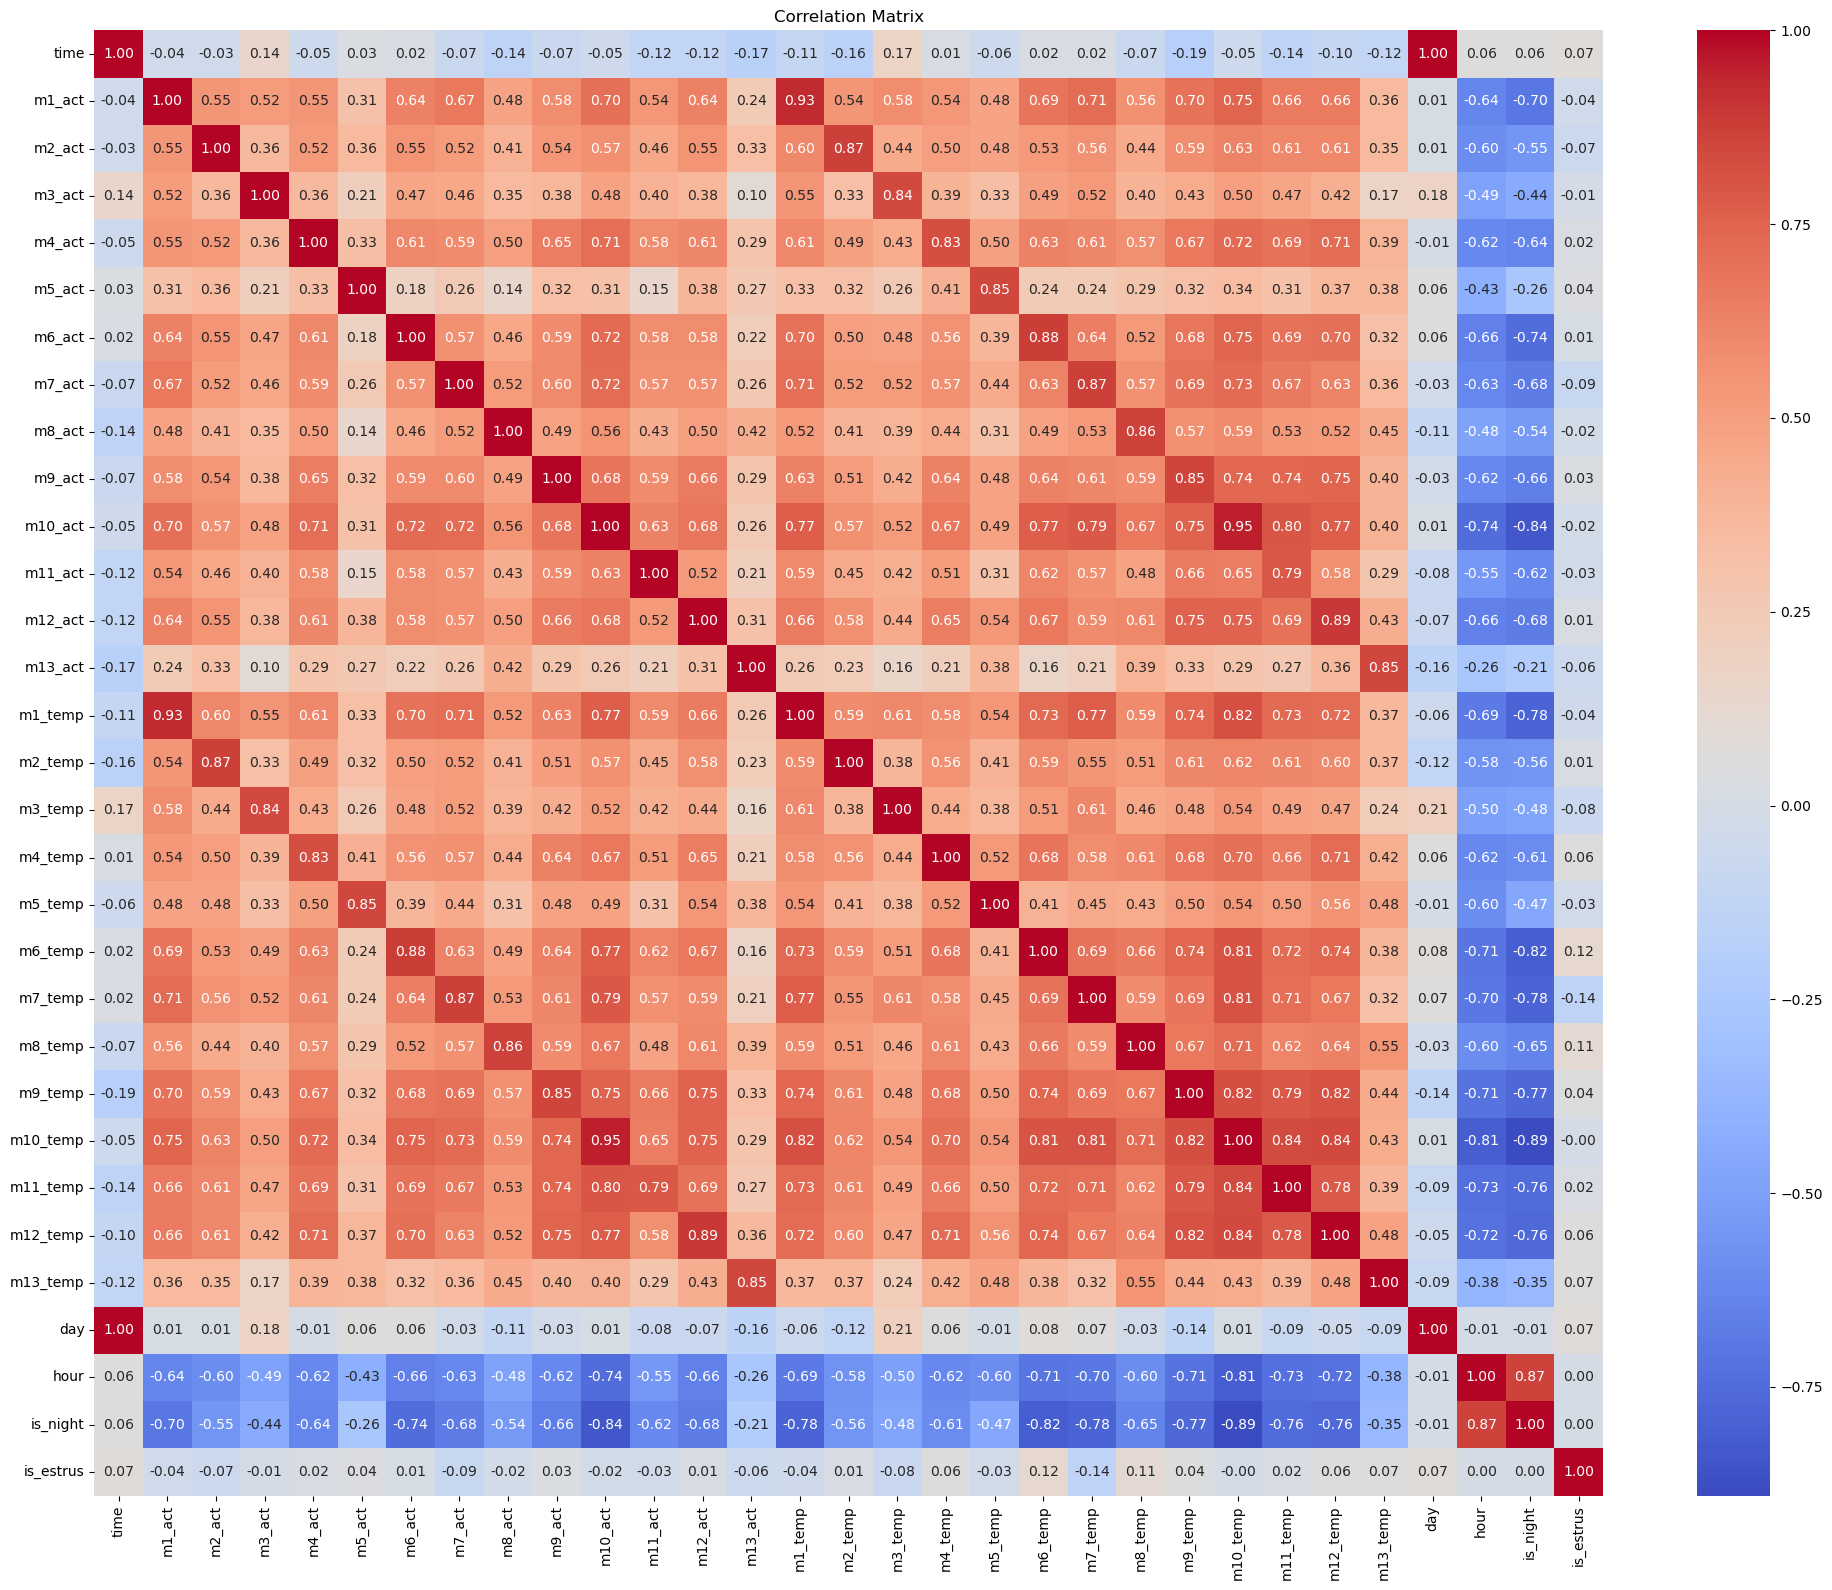

In [64]:
correlation_matrix = df_male.corr()
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

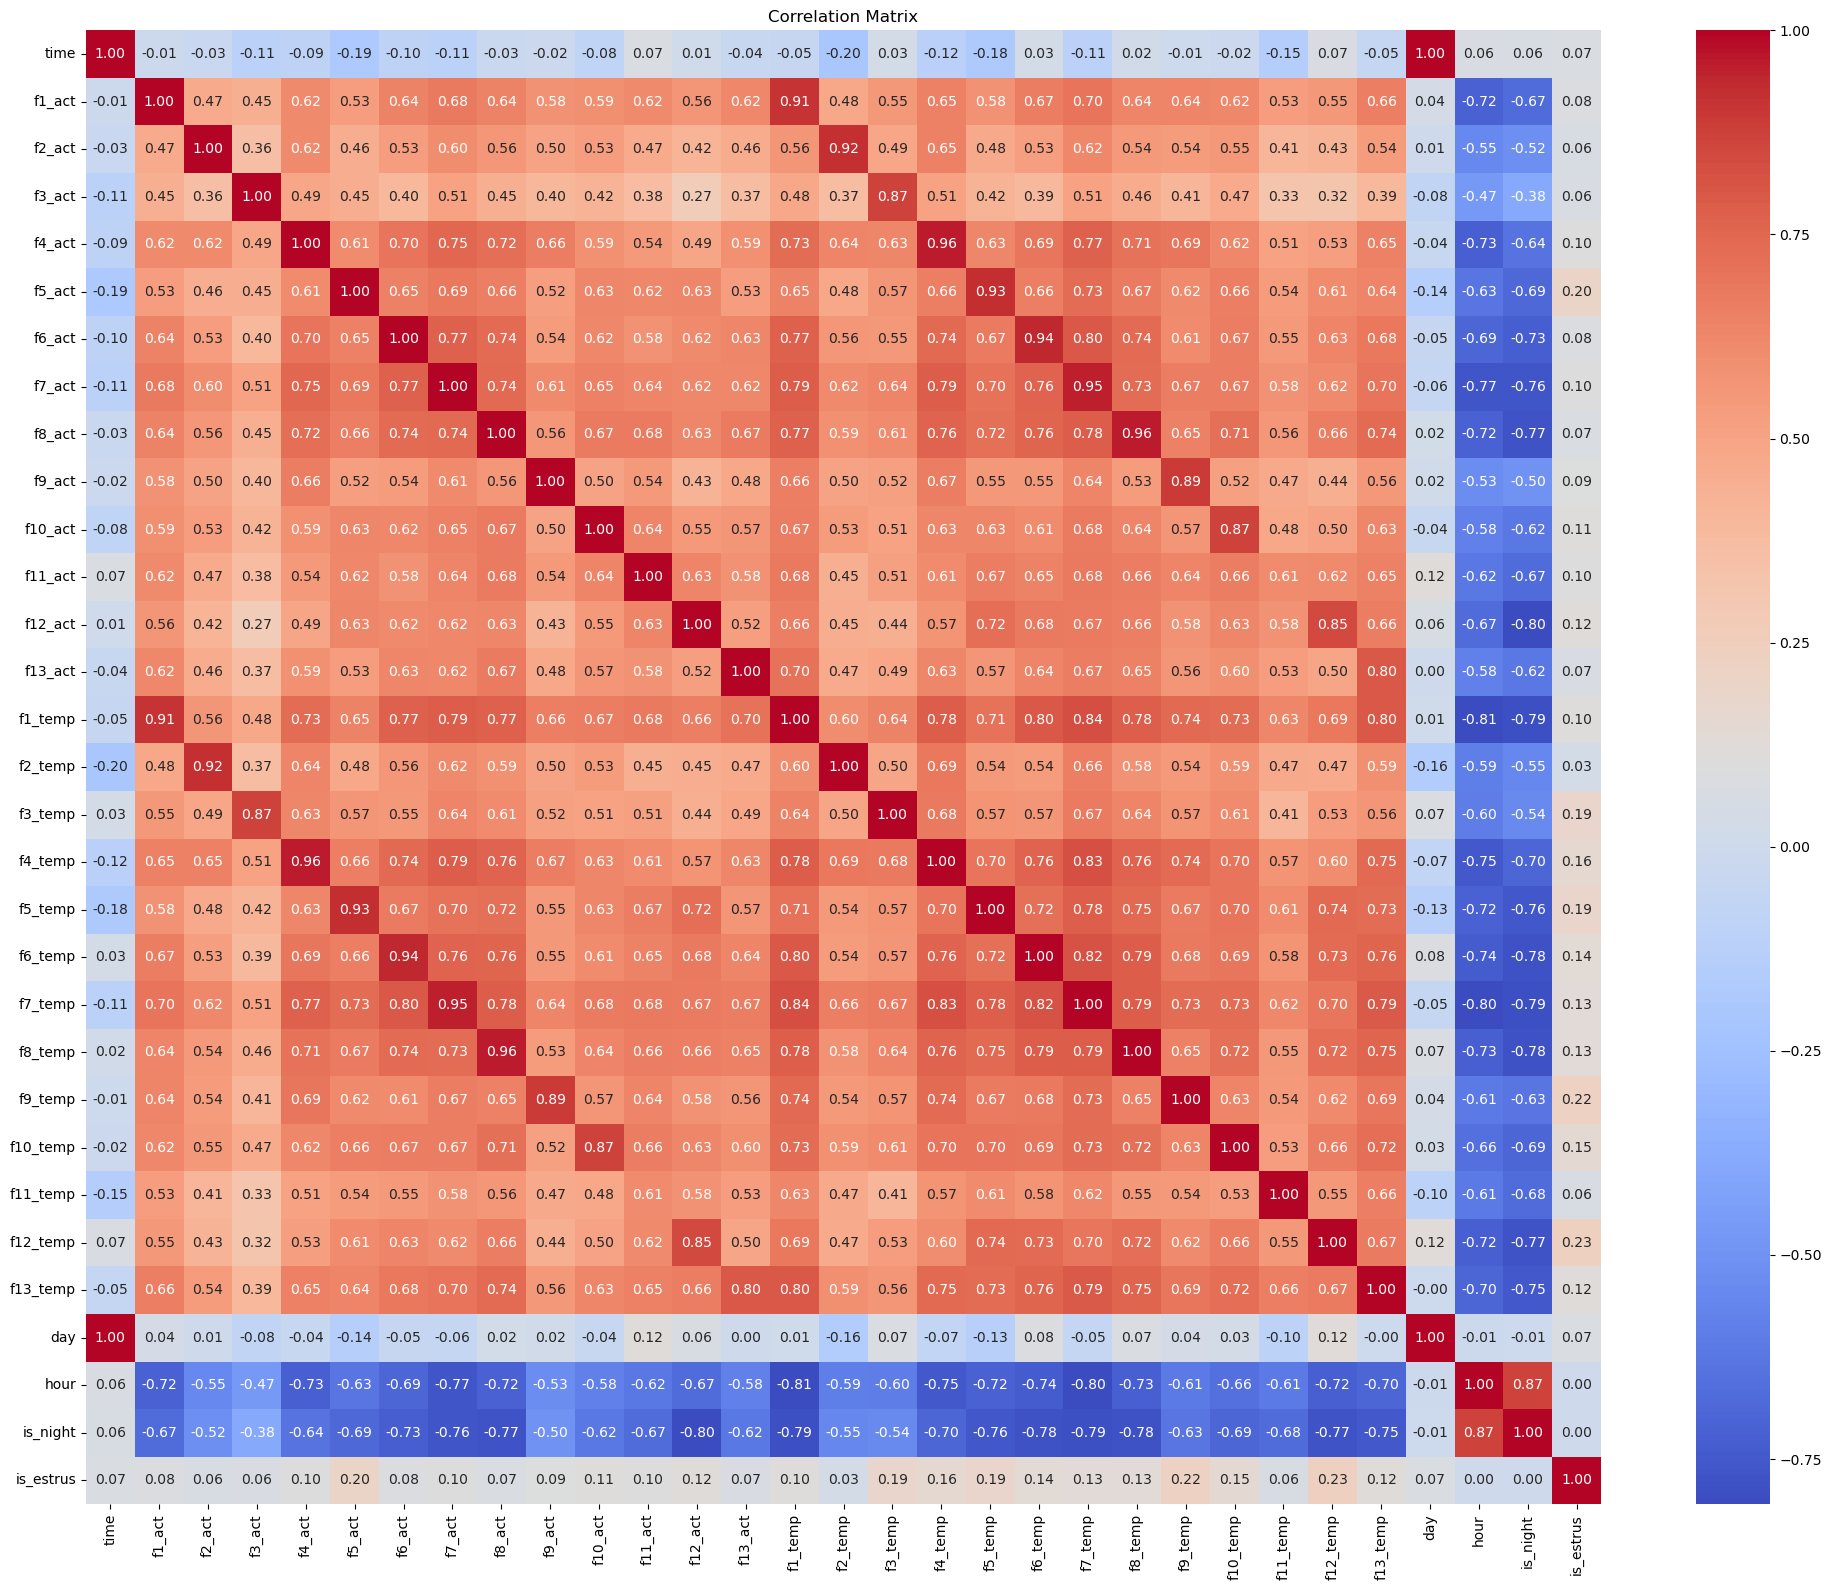

In [65]:
correlation_matrix = df_female.corr()
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [70]:
fig = go.Figure()

# Add each mouse's data as a separate line
for column in df_female.iloc[:,1:-17].columns:
    fig.add_trace(go.Scatter(x=df_female['time'], 
                            y=df_female[column],
                            name=column))

# Add rectangles for night and estrus periods
night_color = 'rgba(0, 0, 255, 0.3)'  # Blue for night
estrus_color = 'rgba(255, 0, 0, 0.5)' # Red for estrus

# Iterate through each row of the DataFrame
for i, row in df_female.iterrows():
    if row['is_night']:
        fig.add_shape(
            type="rect",
            x0=row['time'] - 0.5,
            x1=row['time'] + 0.5,
            y0=0,
            y1=1,
            fillcolor=night_color,
            opacity=0.2,
            line_width=0,
            xref='x',
            yref='y domain'
        )
    if row['is_estrus']:
        fig.add_shape(
            type="rect",
            x0=row['time'] - 0.5,
            x1=row['time'] + 0.5,
            y0=0,
            y1=1,
            fillcolor=estrus_color,
            opacity=0.2,
            line_width=0,
            xref='x',
            yref='y domain'
        )

# Update layout
fig.update_layout(
    title='Female Mouse Activity',
    xaxis_title='Time',
    yaxis_title='Activity',
    legend_title='Mouse ID',
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=1
    )
)

fig.show()

In [67]:
# group by the time of the day and take the mean
male_hourly = df_male.groupby(['hour']).mean()
female_hourly = df_female.groupby(['hour']).mean()

In [68]:
fig = go.Figure()

# Add each mouse's data as a separate line
for column in male_hourly.iloc[:,1:-16].columns:
    fig.add_trace(go.Scatter(x=male_hourly.index, 
                            y=male_hourly[column],
                            name=column))

# Update layout
fig.update_layout(
    title='Male Mouse Activity by Hour',
    xaxis_title='Hour',
    yaxis_title='Activity',
    legend_title='Mouse ID',
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=1
    )
)

fig.show()

In [71]:
fig = go.Figure()

# Add each mouse's data as a separate line
for column in female_hourly.iloc[:,1:-16].columns:
    fig.add_trace(go.Scatter(x=female_hourly.index, 
                            y=female_hourly[column],
                            name=column))

# Update layout
fig.update_layout(
    title='Female Mouse Activity by Hour',
    xaxis_title='Hour',
    yaxis_title='Activity',
    legend_title='Mouse ID',
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=1
    )
)

fig.show()